In [1]:
#%%
from vnpy.app.cta_strategy.backtesting import BacktestingEngine, OptimizationSetting
from vnpy.app.cta_strategy.strategies.atr_adx_sma_m1_strategy import AtrAdxSmaM1Strategy
from vnpy.app.cta_strategy.strategies.boll_cci_m15_strategy import BollCciM15Strategy
from vnpy.app.cta_strategy.strategies.dual_thrust_strategy import DualThrustStrategy
from vnpy.app.cta_strategy.strategies.king_keltner_strategy import KingKeltnerStrategy
from vnpy.app.cta_strategy.strategies.r_breaker_m1_strategy import RBreakerM1Strategy

from datetime import datetime

2019-10-29 17:51:13.439236	开始加载历史数据
2019-10-29 17:51:15.935251	加载进度：##### [56%]
2019-10-29 17:51:17.864251	加载进度：########## [100%]
2019-10-29 17:51:17.865233	历史数据加载完成，数据量：75849
2019-10-29 17:51:17.876246	策略初始化完成
2019-10-29 17:51:17.876246	开始回放历史数据
2019-10-29 17:51:19.745244	历史数据回放结束
2019-10-29 17:51:19.746245	开始计算逐日盯市盈亏
2019-10-29 17:51:19.749235	逐日盯市盈亏计算完成
2019-10-29 17:51:19.749235	开始计算策略统计指标
2019-10-29 17:51:19.764038	------------------------------
2019-10-29 17:51:19.764038	首个交易日：	2019-09-02
2019-10-29 17:51:19.764038	最后交易日：	2019-10-25
2019-10-29 17:51:19.765038	总交易日：	54
2019-10-29 17:51:19.765038	盈利交易日：	28
2019-10-29 17:51:19.765038	亏损交易日：	26
2019-10-29 17:51:19.765038	起始资金：	200,000.00
2019-10-29 17:51:19.765038	结束资金：	264,056.63
2019-10-29 17:51:19.766039	总收益率：	32.03%
2019-10-29 17:51:19.766039	年化收益：	142.35%
2019-10-29 17:51:19.766039	最大回撤: 	-14,552.70
2019-10-29 17:51:19.766039	百分比最大回撤: -6.61%
2019-10-29 17:51:19.766039	总盈亏：	64,056.63
2019-10-29 17:51:19.767039	总手续费：	0.00
2019-10-

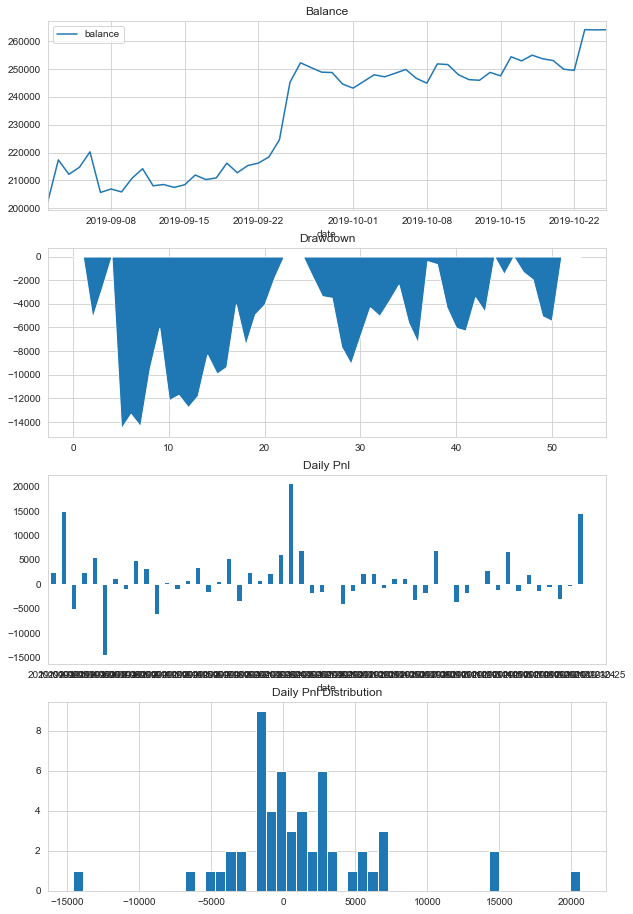

In [2]:
#%%
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="BTCUSDT.OKEX",
    interval="1m",
    start=datetime(2019, 9, 1),
    end=datetime(2019, 10, 25),
    rate=0.0,
    slippage=0.0,
    size=1,
    pricetick=0.01,
    capital=200_000,
)

engine.add_strategy(RBreakerM1Strategy, {})

#%%
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics();
engine.show_chart()

In [ ]:
setting = OptimizationSetting()
setting.set_target("total_return")

setting.add_parameter("kk_length", 5, 20, 1)
setting.add_parameter("kk_dev", 0.1, 5, 0.1)
setting.add_parameter("trailing_percent", 0.1, 2, 0.1)

engine.run_ga_optimization(setting, population_size=20, ngen_size=500)